# Parcial 1 
Juan Camilo Cuenca S - Diego alexander Jimenez
## Cargar el dataset y borrar datos nulos

In [2]:
import pandas as pd

# 1. Cargar el dataset

df = pd.read_csv('vgchartz-2024.csv')

# 2. Mostrar información inicial

print("=== Encabezado del Dataset ===")
print(df.head())
print("\n=== Información del Dataset ===")
print(df.info())
print("\n=== Dimensiones del Dataset ===")
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")
print("\n=== Valores faltantes (antes de limpieza) ===")
print(df.isnull().sum())


# 3. Eliminar columnas innecesarias

# Nos quedamos solo con las columnas útiles para el análisis
columns_to_keep = [
    'title', 'console', 'genre', 'publisher', 'developer', 
    'critic_score', 'total_sales', 'na_sales', 'jp_sales', 
    'pal_sales', 'other_sales', 'release_date'
]
df = df[columns_to_keep]

print("\n=== Dataset después de eliminar columnas innecesarias ===")
print(df.head())
print(f"Columnas actuales: {list(df.columns)}")

# 4. Eliminar filas con valores nulos

df_cleaned = df.dropna()
print(f"\n=== Después de eliminar los valores faltantes: {df_cleaned.shape[0]} filas ===")
print("\n=== Verificación de nulos ===")
print(df_cleaned.isnull().sum())


=== Encabezado del Dataset ===
                                             img                        title  \
0  /games/boxart/full_6510540AmericaFrontccc.jpg           Grand Theft Auto V   
1  /games/boxart/full_5563178AmericaFrontccc.jpg           Grand Theft Auto V   
2                    /games/boxart/827563ccc.jpg  Grand Theft Auto: Vice City   
3  /games/boxart/full_9218923AmericaFrontccc.jpg           Grand Theft Auto V   
4  /games/boxart/full_4990510AmericaFrontccc.jpg    Call of Duty: Black Ops 3   

  console    genre       publisher       developer  critic_score  total_sales  \
0     PS3   Action  Rockstar Games  Rockstar North           9.4        20.32   
1     PS4   Action  Rockstar Games  Rockstar North           9.7        19.39   
2     PS2   Action  Rockstar Games  Rockstar North           9.6        16.15   
3    X360   Action  Rockstar Games  Rockstar North           NaN        15.86   
4     PS4  Shooter      Activision        Treyarch           8.1        15.09

# Preguntas

- ¿Cuáles son los 10 videojuegos más vendidos globalmente?
  
- ¿Cómo ha evolucionado la industria de los videojuegos por año según las ventas?
  
- ¿Cuáles son los géneros más populares y cómo se distribuyen sus ventas?
  
- ¿Qué plataformas tienen más juegos en el top de ventas?
  
- ¿Existe una relación entre la puntuación de los críticos y las ventas totales?

## ¿Cuáles son los 10 videojuegos más vendidos globalmente?

C:\Users\camil\AppData\Local\Temp\ipykernel_14448\2478960472.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='total_sales', y='title', data=top_10, errorbar=None, palette='viridis')


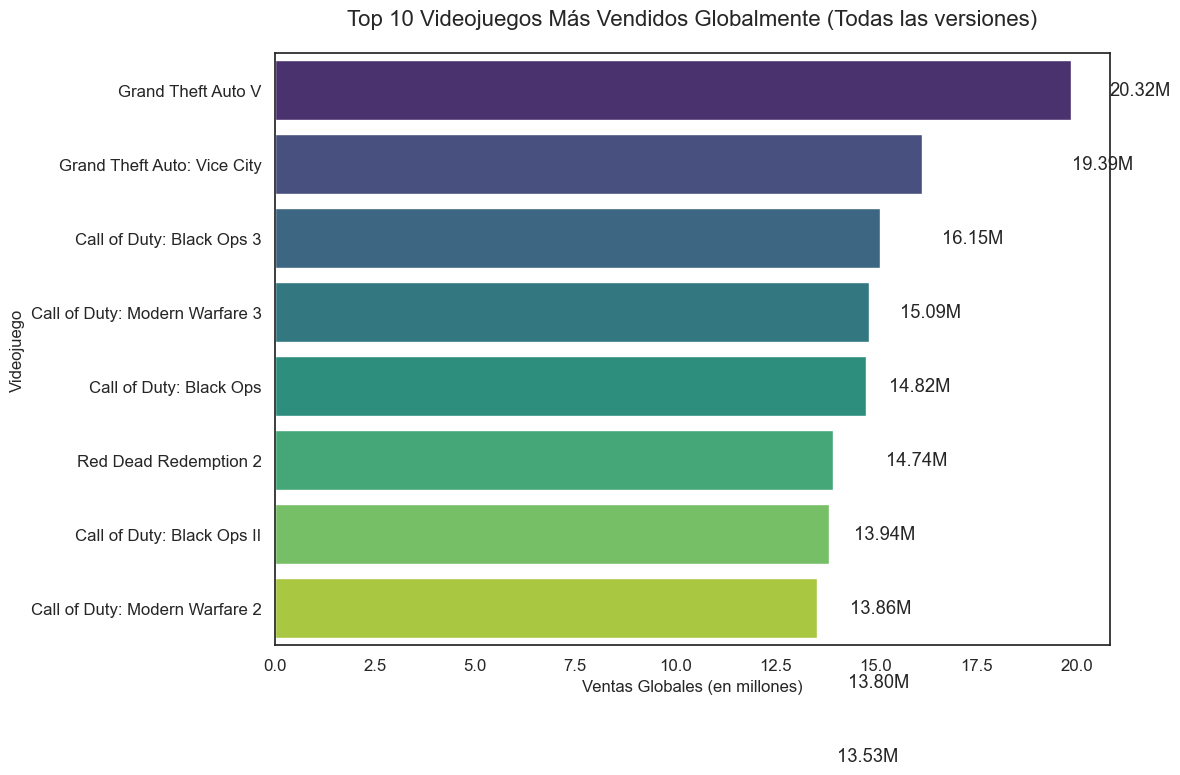

Gráfico guardado como 'Graficos/top10_videojuegos_vendidos.png'


In [6]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Obtener los 10 juegos más vendidos
top_10 = df_cleaned.nlargest(10, 'total_sales')[['title', 'total_sales']]

# 2. Crear carpeta si no existe
os.makedirs('Graficos', exist_ok=True)

# 3. Crear el gráfico de barras
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='total_sales', y='title', data=top_10, errorbar=None, palette='viridis')

# 4. Añadir etiquetas con los valores
for i, v in enumerate(top_10['total_sales']):
    ax.text(v + 0.5, i, f'{v:.2f}M', va='center')

# 5. Personalizar títulos y ejes
plt.title('Top 10 Videojuegos Más Vendidos Globalmente (Todas las versiones)', fontsize=16, pad=20)
plt.xlabel('Ventas Globales (en millones)', fontsize=12)
plt.ylabel('Videojuego', fontsize=12)

# 6. Ajustar el diseño y guardar
plt.tight_layout()
plt.savefig('Graficos/top10_videojuegos_vendidos.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print("Gráfico guardado como 'Graficos/top10_videojuegos_vendidos.png'")

## ¿Cómo ha evolucionado la industria de los videojuegos por año según las ventas?

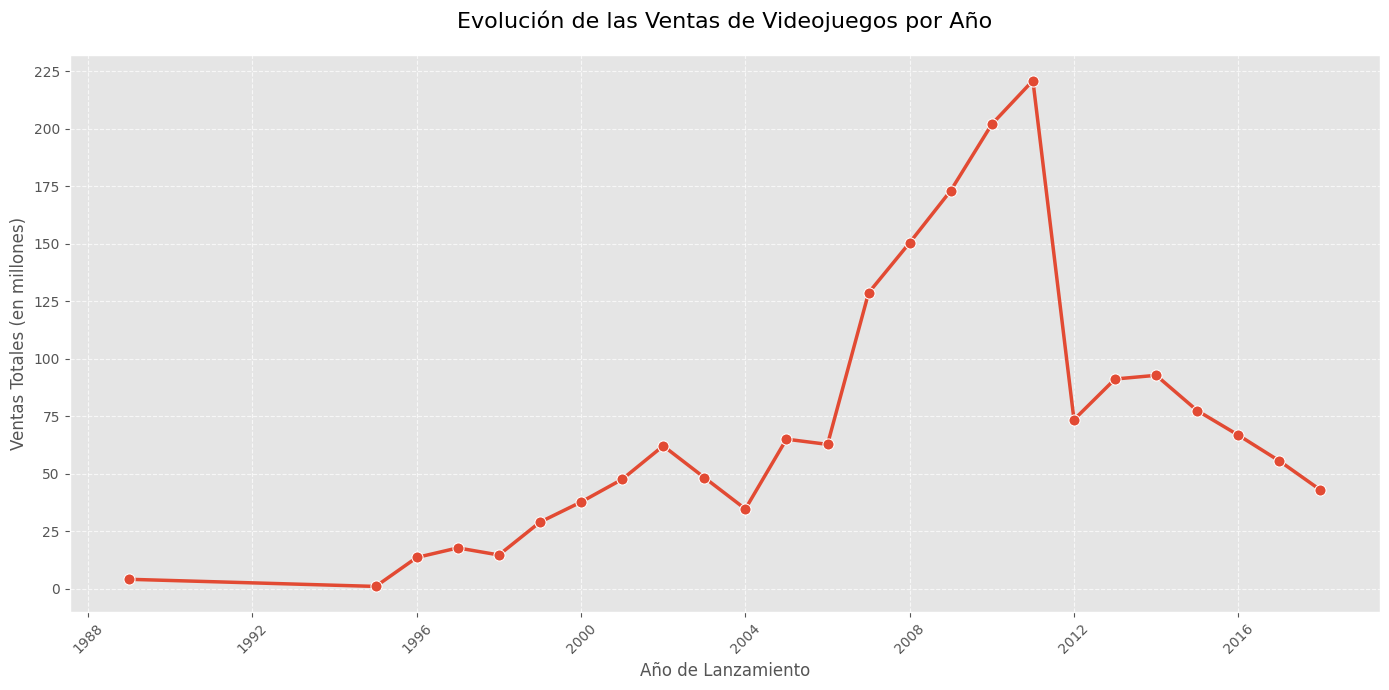

Gráfico guardado como 'Graficos/evolucion_ventas_anuales.png'

Ventas Totales por Año (últimos 10 años):
    release_year  total_sales
24          2018        42.98
23          2017        55.62
22          2016        66.84
21          2015        77.49
20          2014        92.83
19          2013        91.22
18          2012        73.54
17          2011       220.94
16          2010       201.97
15          2009       173.12


In [ ]:
# Crear y guardar el gráfico de evolución de ventas
plt.figure(figsize=(14, 7))
sns.lineplot(x='release_year', y='total_sales', data=yearly_sales, 
             marker='o', linewidth=2.5, markersize=8)

# Personalización del gráfico
plt.title('Evolución de las Ventas de Videojuegos por Año', fontsize=16, pad=20)
plt.xlabel('Año de Lanzamiento', fontsize=12)
plt.ylabel('Ventas Totales (en millones)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=10))
plt.xticks(rotation=45)



# Guardar el gráfico
plt.tight_layout()
plt.savefig('Graficos/evolucion_ventas_anuales.png', dpi=300, bbox_inches='tight')

plt.show()
plt.close()

print("Gráfico guardado como 'Graficos/evolucion_ventas_anuales.png'")

# Mostrar tabla de los últimos 10 años
print("\nVentas Totales por Año (últimos 10 años):")
print(yearly_sales.sort_values('release_year', ascending=False).head(10))

## ¿Cuáles son los géneros más populares y cómo se distribuyen sus ventas?

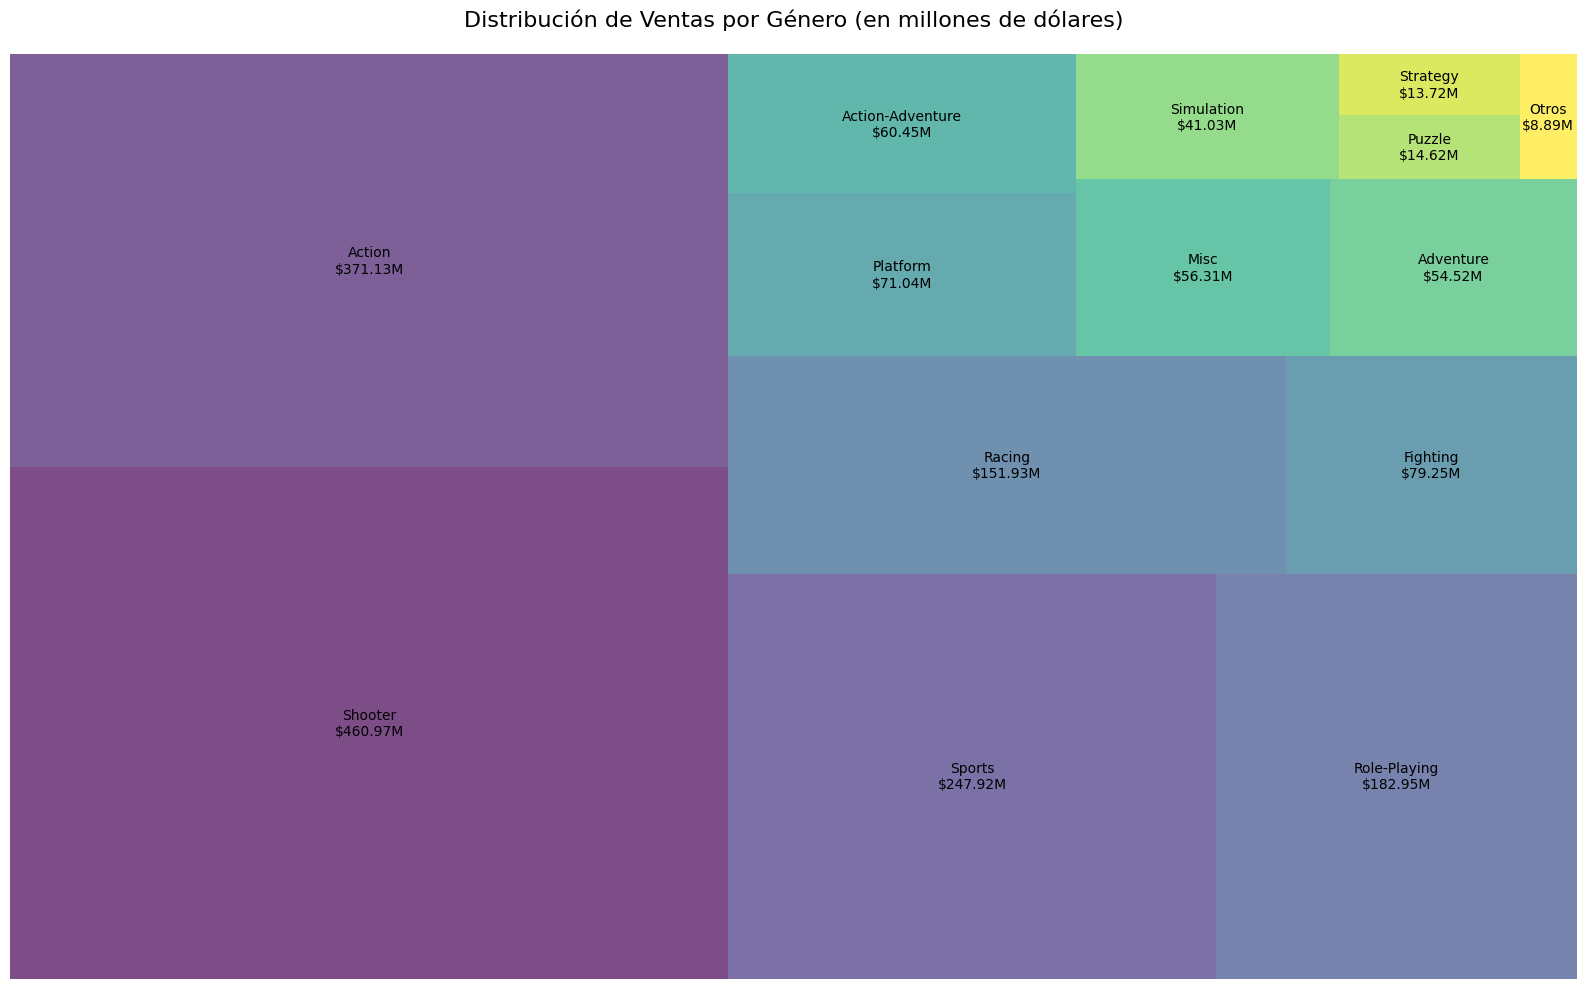

Gráfico guardado como 'Graficos/treemap_ventas_generos.png'

Ventas totales por género (en millones):
genre
Shooter             460.97
Action              371.13
Sports              247.92
Role-Playing        182.95
Racing              151.93
Fighting             79.25
Platform             71.04
Action-Adventure     60.45
Misc                 56.31
Adventure            54.52
Simulation           41.03
Puzzle               14.62
Strategy             13.72
Otros                 8.89
Name: total_sales, dtype: float64


In [ ]:
# Crear carpeta si no existe
import os
os.makedirs('Graficos', exist_ok=True)

# Configurar la figura para el treemap
plt.figure(figsize=(16, 10))
colors = plt.cm.viridis(np.linspace(0, 1, len(genre_sales)))
squarify.plot(sizes=genre_sales.values,
              label=[f'{label}\n${value:,.2f}M' for label, value in zip(genre_sales.index, genre_sales.values)],
              color=colors,
              alpha=0.7,
              text_kwargs={'fontsize':10})

# Añadir título y formato
plt.title('Distribución de Ventas por Género (en millones de dólares)', fontsize=16, pad=20)
plt.axis('off')
plt.tight_layout()

# Guardar el gráfico
plt.savefig('Graficos/treemap_ventas_generos.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print("Gráfico guardado como 'Graficos/treemap_ventas_generos.png'")

# Mostrar tabla con los datos
print("\nVentas totales por género (en millones):")
print(genre_sales.round(2))

## ¿Qué plataformas tienen más juegos en el top de ventas?

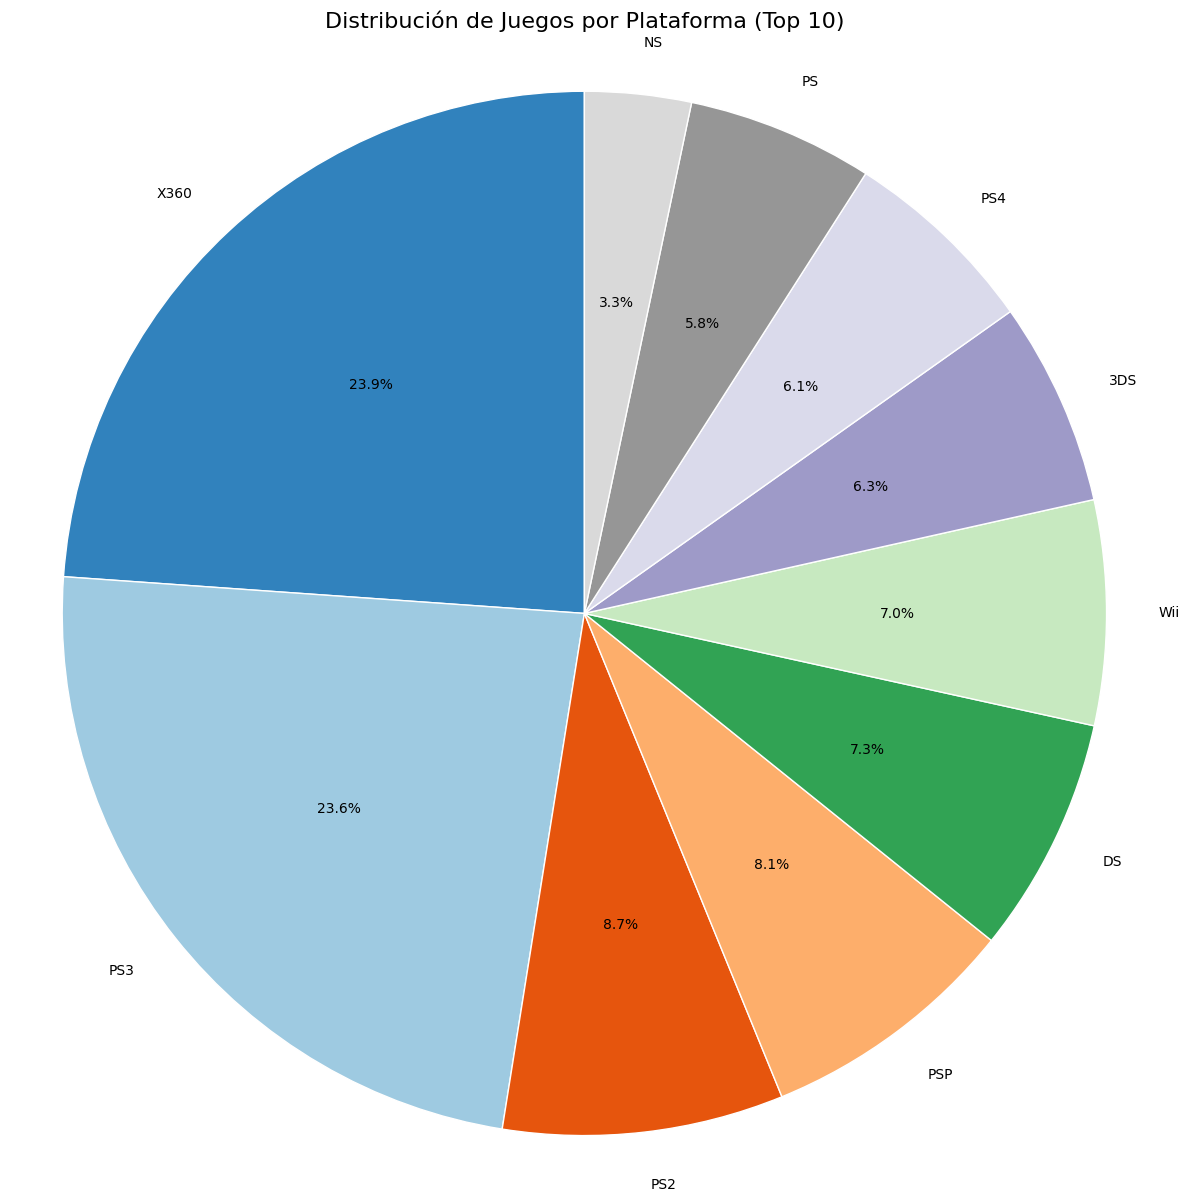

Gráfico guardado como 'Graficos/pie_plataformas_top10.png'

Cantidad de juegos por plataforma en el top de ventas:
console
X360    261
PS3     258
PS2      95
PSP      88
DS       80
Wii      76
3DS      69
PS4      67
PS       63
NS       36
Name: count, dtype: int64


In [ ]:
# Crear carpeta si no existe
import os
os.makedirs('Graficos', exist_ok=True)

# Configurar la figura para el gráfico de pastel
plt.figure(figsize=(12, 12))

# Crear el gráfico de pastel
plt.pie(platform_counts, 
        labels=platform_counts.index, 
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.tab20c(np.linspace(0, 1, len(platform_counts))),
        wedgeprops={'edgecolor': 'white', 'linewidth': 1},
        textprops={'fontsize': 10})

# Añadir título y formato
plt.title('Distribución de Juegos por Plataforma (Top 10)', fontsize=16, pad=20)
plt.axis('equal')
plt.tight_layout()

# Guardar el gráfico
plt.savefig('Graficos/pie_plataformas_top10.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print("Gráfico guardado como 'Graficos/pie_plataformas_top10.png'")

# Mostrar tabla con los datos
print("\nCantidad de juegos por plataforma en el top de ventas:")
print(platform_counts)

## ¿Existe una relación entre la puntuación de los críticos y las ventas totales?

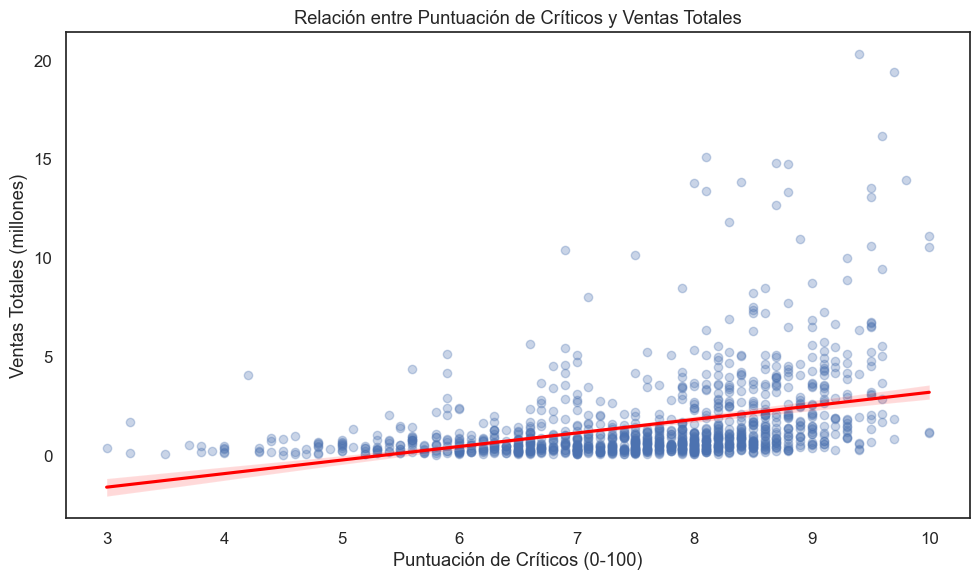

In [ ]:

plt.figure(figsize=(10, 6))


sns.regplot(
    x='critic_score', 
    y='total_sales', 
    data=df_cleaned, 
    scatter_kws={'alpha':0.3}, 
    line_kws={'color':'red'}
)

# Añadir un título descriptivo al gráfico
plt.title('Relación entre Puntuación de Críticos y Ventas Totales')

# Etiqueta del eje X
plt.xlabel('Puntuación de Críticos (0-100)')

# Etiqueta del eje Y
plt.ylabel('Ventas Totales (millones)')

# Ajustar los márgenes del gráfico para que no se solapen los textos
plt.tight_layout()

# Guardar el gráfico como imagen en la carpeta "Graficos"

plt.savefig('Graficos/relacion_calificaciones_ventas.png', dpi=300, bbox_inches='tight')
plt.show()
